In [64]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [65]:
data = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [66]:
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [68]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [69]:
data.rename(columns = {'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'UniversityRating',
                      'LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'},inplace = True)

In [70]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
data.isnull().any()

Serial No.          False
GRE_Score           False
TOEFL_Score         False
UniversityRating    False
SOP                 False
LOR                 False
CGPA                False
Research            False
Chance_of_Admit     False
dtype: bool

In [72]:
data["Chance_of_Admit"]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit, Length: 500, dtype: float64

In [73]:
data.corr()

,Serial No.,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


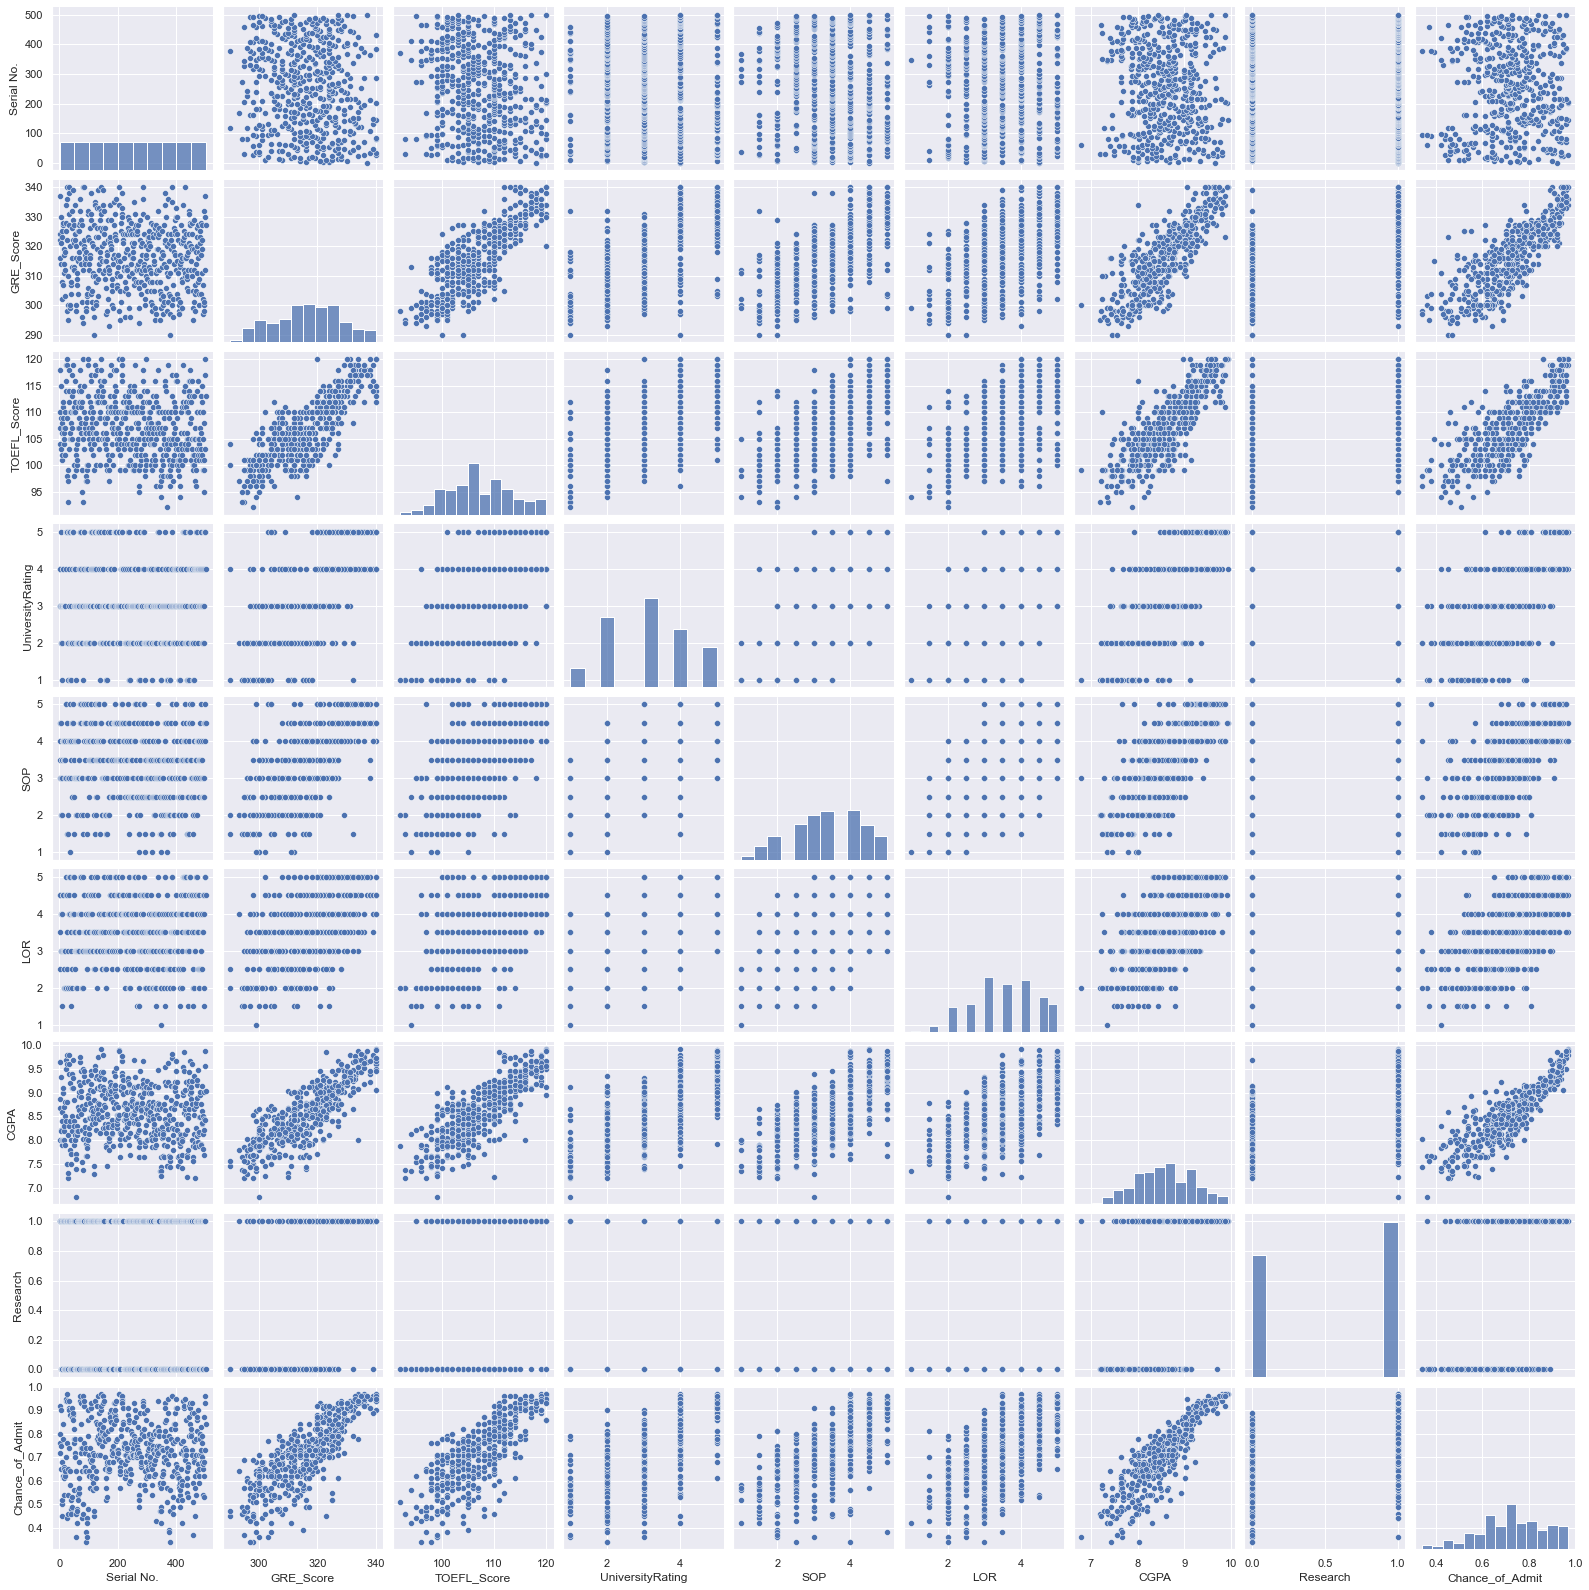

In [74]:
import seaborn as sns
sns.pairplot(data)

<AxesSubplot:>

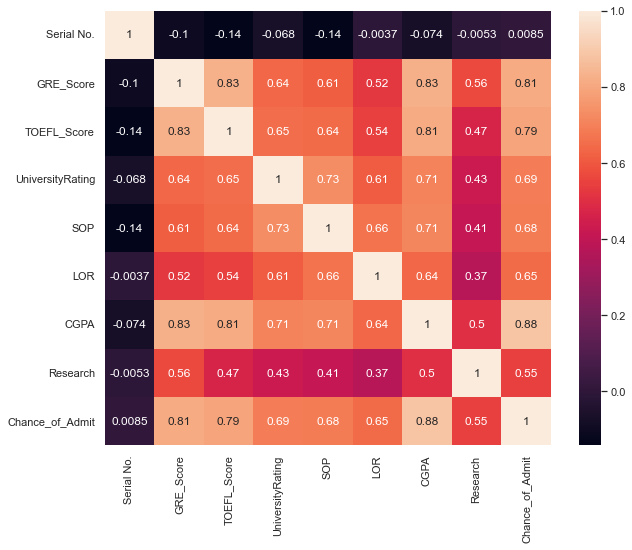

In [75]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(data.corr(),annot=True)


C:\Users\ksamant\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE_Score'>

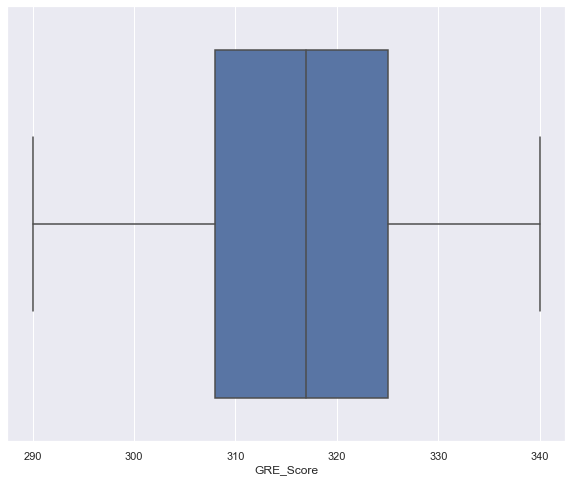

In [76]:
sns.boxplot(data["GRE_Score"])

C:\Users\ksamant\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL_Score'>

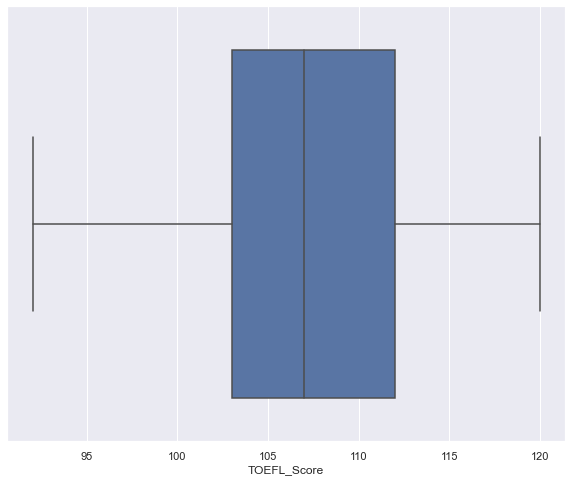

In [77]:
sns.boxplot(data["TOEFL_Score"])

C:\Users\ksamant\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UniversityRating'>

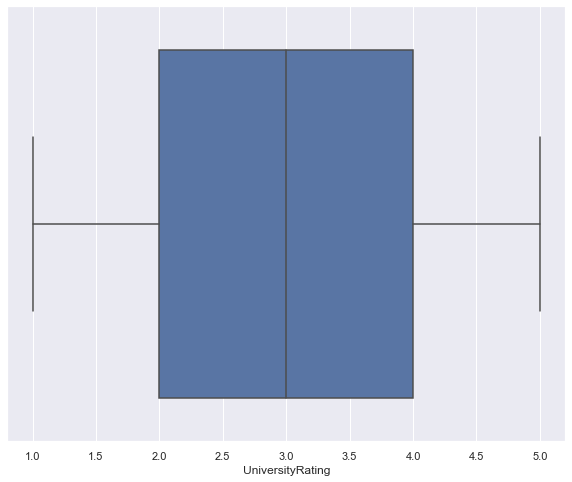

In [78]:
sns.boxplot(data["UniversityRating"])

C:\Users\ksamant\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP'>

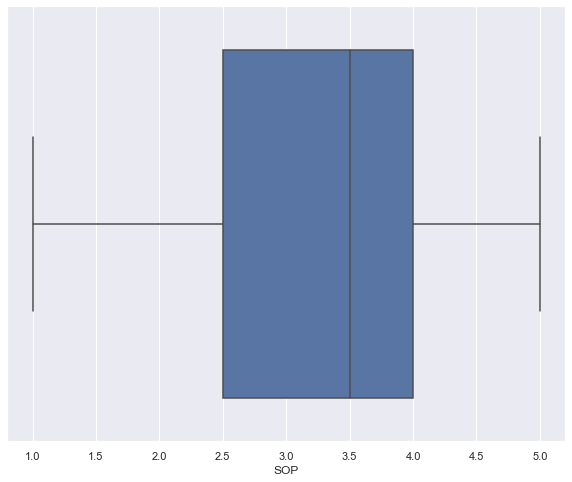

In [79]:
sns.boxplot(data["SOP"])

C:\Users\ksamant\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOR'>

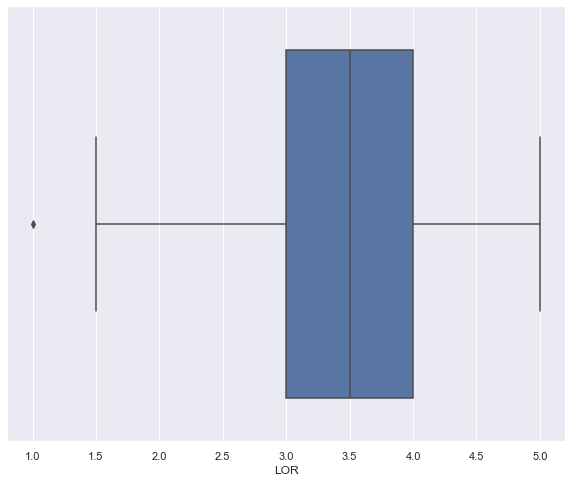

In [80]:
sns.boxplot(data["LOR"])

C:\Users\ksamant\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA'>

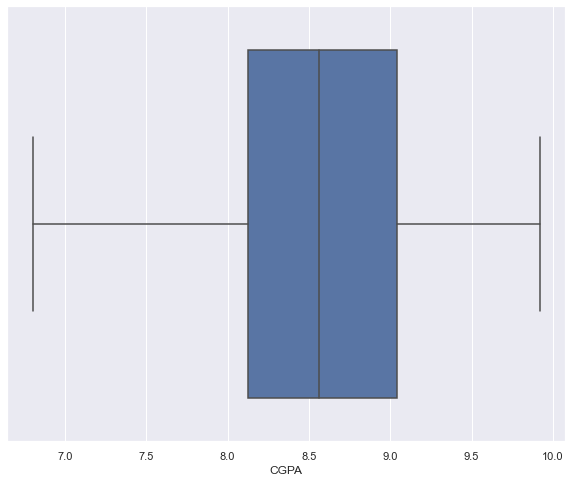

In [81]:
sns.boxplot(data["CGPA"])

C:\Users\ksamant\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research'>

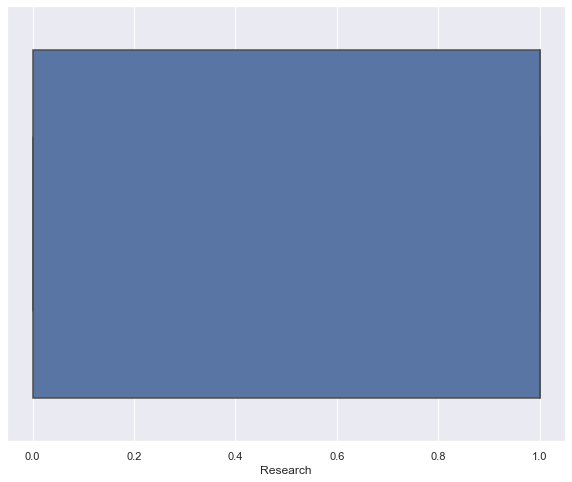

In [82]:
sns.boxplot(data['Research'])

In [83]:
data.corr()

,Serial No.,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# CREATION OF TARGET AND TRAIN DATA

In [84]:
y = data.Chance_of_Admit

In [85]:
X= data.drop(["Serial No.","Chance_of_Admit"],axis =1)

In [86]:
X.head()

,GRE_Score,TOEFL_Score,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


# TRAIN_TEST SPLIT

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [88]:
X_train.shape

(335, 7)

In [89]:
X_test.shape

(165, 7)

In [90]:
y_train.shape

(335,)

In [91]:
y_test.shape

(165,)

# STANDARDIZATION OF DATA

In [47]:
from sklearn.preprocessing import StandardScaler
sac=StandardScaler()

In [53]:
X_train = sac.fit_transform(X_train)

In [54]:
X_train

array([[ 0.02417691,  0.3462446 , -0.06803253, ..., -0.45377951,
         0.35202547, -1.10387637],
       [ 0.80797687,  0.01672204, -0.06803253, ...,  0.08148857,
         0.91782378,  0.90589855],
       [ 1.59177682,  1.49957357,  0.80854045, ..., -0.45377951,
        -0.87656514,  0.90589855],
       ...,
       [ 0.1112658 , -0.14803924, -0.06803253, ..., -0.45377951,
        -1.05438747,  0.90589855],
       [-1.36924523, -1.13660692, -0.06803253, ..., -0.45377951,
         0.19036881,  0.90589855],
       [-0.23708974, -0.80708436, -0.06803253, ..., -0.98904759,
         0.22270014, -1.10387637]])

In [56]:
X_test=sac.transform(X_test)

C:\Users\ksamant\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
 X_test

array([[-27.37245328, -17.36566332,  -1.22062657, ...,  -1.85908002,
        -11.88111576,   0.7167758 ],
       [-27.4255446 , -17.41995587,  -1.22062657, ...,  -1.85908002,
        -11.410724  ,   0.7167758 ],
       [-27.41796013, -17.58283355,  -2.75738695, ...,  -3.57815154,
        -12.9002979 ,  -3.32241942],
       ...,
       [-27.31177749, -17.44710215,  -1.98900676, ...,  -1.85908002,
        -10.67900348,   0.7167758 ],
       [-27.43312907, -17.80000379,  -2.75738695, ...,  -1.85908002,
        -13.55361979,   0.7167758 ],
       [-27.46346697, -17.52854099,  -3.52576713, ...,  -3.57815154,
        -13.7626828 ,  -3.32241942]])

# STANDARDIZATION OF DATA IS NOT REQUIRED , HOWEVER I TRIED TO DO , SO GOT A BAD SCORE, DO NOT PERFORM UNECESSARY STANDARDIZATION

# MODEL BUILDING AND TRAIN

In [92]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
reg_pred=regression.predict(X_test)

In [93]:
reg_pred

array([0.9107113 , 0.90759599, 0.76906036, 0.84881536, 0.71667832,
       0.7512899 , 0.65235504, 0.84393297, 0.62051167, 0.74850953,
       0.91176483, 0.85124402, 0.83818163, 0.67505448, 0.78059332,
       0.7439309 , 0.84583261, 0.94220609, 0.78084961, 0.61690318,
       0.72522649, 0.6007057 , 0.61706043, 0.85633091, 0.51374473,
       0.92542485, 0.72465749, 0.50887897, 0.69695443, 0.72829112,
       0.95145338, 0.78293011, 0.56650061, 0.67011746, 0.7303094 ,
       0.88058191, 0.80380279, 0.66870558, 0.66625316, 0.73112895,
       0.89970513, 0.62541967, 0.69193952, 0.91030853, 0.95848776,
       0.54738221, 0.61272735, 0.78465263, 0.78661451, 0.70574401,
       0.77488459, 0.72276714, 0.57987196, 0.59547514, 0.71045862,
       0.77343322, 0.85601414, 0.59895825, 0.7761966 , 0.92061138,
       0.66179013, 0.89668408, 0.73266154, 0.5286099 , 0.81263553,
       0.53783264, 0.71929744, 0.69826566, 0.52205862, 0.78219528,
       0.913217  , 0.55964181, 0.60679848, 0.74861036, 0.70614

In [98]:
from sklearn import svm
regression1=regr = svm.SVR()
regression1.fit(X_train,y_train)
reg_pred1=regression1.predict(X_test)

In [99]:
reg_pred1

array([0.84199034, 0.79203069, 0.76429514, 0.77172055, 0.62351095,
       0.7116566 , 0.66590352, 0.80383094, 0.6438578 , 0.6756319 ,
       0.81634483, 0.76063899, 0.79902525, 0.66535553, 0.7702225 ,
       0.72416643, 0.8430444 , 0.89329106, 0.6913243 , 0.63147526,
       0.66167136, 0.69848511, 0.64634754, 0.78083339, 0.52413987,
       0.85673002, 0.67303915, 0.65386001, 0.69833455, 0.73178914,
       0.87333111, 0.79987433, 0.5642094 , 0.64382722, 0.73720515,
       0.83594451, 0.76358303, 0.5820499 , 0.63593936, 0.6525837 ,
       0.85359132, 0.66359368, 0.66389687, 0.81084006, 0.87571699,
       0.55965511, 0.59892902, 0.77858898, 0.75465629, 0.66441033,
       0.75206266, 0.72143245, 0.62058851, 0.6533072 , 0.7256555 ,
       0.7431436 , 0.78642003, 0.62695933, 0.72085327, 0.83637582,
       0.68515395, 0.75638571, 0.74693232, 0.54946376, 0.75249211,
       0.58153421, 0.74255013, 0.66459355, 0.55494091, 0.77892023,
       0.83403413, 0.58093662, 0.62711795, 0.70575183, 0.74044

# METRICS 

# LINEAR REGRESSION METRICS


In [94]:
## Performance Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.0032132236896673183
0.03892036207049488
0.0566853040008371


In [95]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.8132717588072773


In [96]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8049462958241622

# SVR METRICS

In [100]:
## Performance Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred1))
print(mean_absolute_error(y_test,reg_pred1))
print(np.sqrt(mean_squared_error(y_test,reg_pred1)))

0.005845178000278129
0.06101790893356731
0.07645376380714117


In [102]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,reg_pred1)
print(score)

0.6603224945215889


In [107]:
print("adjusted R score is : ",1 - (1-score1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

adjusted R score is :  0.6451776375894305
